# imports

In [40]:
import pandas as pd
import numpy as np
import INS_Analysis as insd
import seaborn as sns
import matplotlib.pyplot as plt

# data

In [41]:
# true_c_concentrations = trials['6000'].values
# true_c_concentrations = np.array([float(x) for x in true_c_concentrations])
# true_c_concentrations = -true_c_concentrations
# true_c_concentrations = true_c_concentrations.tolist()

# true_si_concentrations = trials['14000'].values
# true_si_concentrations = np.array([float(x) for x in true_si_concentrations])
# true_si_concentrations = -true_si_concentrations
# true_si_concentrations = true_si_concentrations.tolist()

# concentrations = [[si, c] for c, si in zip(true_c_concentrations, true_si_concentrations)]


In [42]:
generator_path = '../../simulations/SoilInSections2/data/'
spectrums = generator_path+'spectrums.npz'
spectrums = np.load(spectrums)
bins = spectrums['x']
spectrums = spectrums['y']

In [43]:
trials = '../../simulations/SoilInSections2/gen/inp/'+'df.pkl'
trials = pd.read_pickle(trials)
trials

,name,slice_level,lms
0,runWith1Slices,1,[0.15]
1,runWith2Slices,2,"[0.1166666667, 0.2166666667]"
2,runWith3Slices,3,"[0.1, 0.1666666667, 0.2333333333]"
3,runWith5Slices,5,"[0.0833333333, 0.1233333333, 0.1633333333, 0.2..."
4,runWith10Slices,10,"[0.0681818182, 0.0881818182, 0.1081818182, 0.1..."
5,runWith50Slices,50,"[0.0539215686, 0.0579215686, 0.0619215686, 0.0..."
6,runWith100Slices,100,"[0.051980198, 0.053980198, 0.055980198, 0.0579..."
7,runWith500Slices,500,"[0.0503992016, 0.0507992016, 0.0511992016, 0.0..."
8,runWith1000Slices,1000,"[0.0501998002, 0.0503998002, 0.0505998002, 0.0..."


In [44]:
import matplotlib

In [45]:
# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })

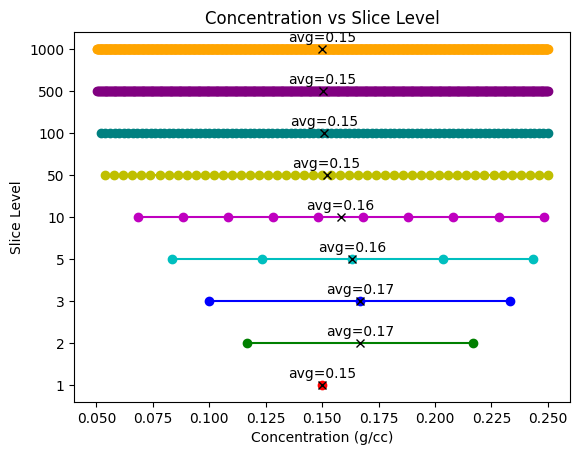

In [46]:
slice_levels = trials['slice_level']
lms = trials['lms']

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'teal', 'purple', 'orange']
for i in range(len(lms)):
    color = colors[i]
    plt.plot(lms[i], [i]*len(lms[i]), label=f"level {slice_levels[i]}", marker='o', color=color)
    plt.plot(np.average(lms[i]), [i], label=f"level {slice_levels[i]}", marker='x', color='black')
plt.xlabel('Concentration (g/cc)')
plt.ylabel('Slice Level')
plt.title('Concentration vs Slice Level')
plt.yticks(range(len(lms)), slice_levels)
# plt.legend()
# add annotation "x is the average
for i in range(len(lms)):
    avg = np.average(lms[i])
    plt.annotate(f'avg={avg:.2f}', (avg, i), textcoords="offset points", xytext=(0,5), ha='center')

plt.savefig('imgs/mcnp_carbon_content.png')
plt.show()

In [47]:
from PIL import Image

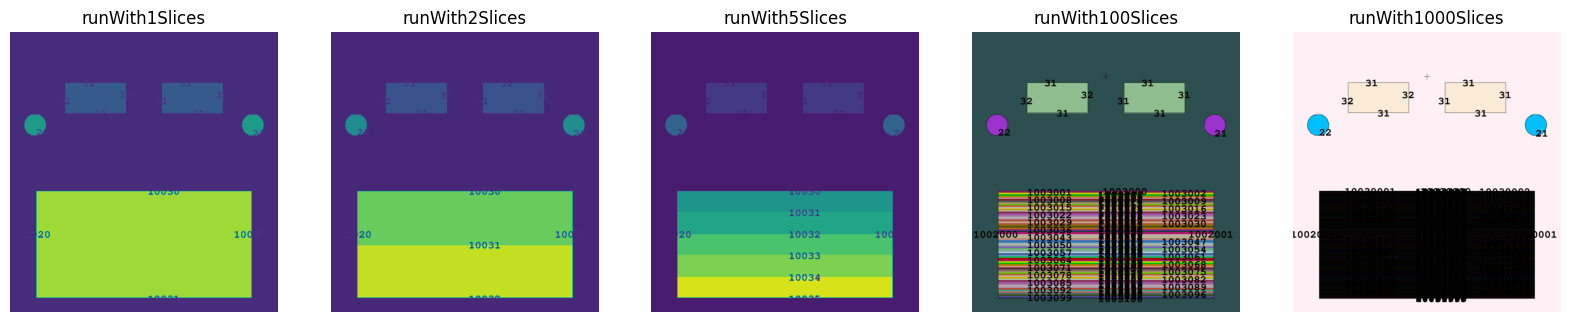

In [48]:
img_folder = '../../simulations/SoilInSections2/data/vis/'
indx_to_show = [0, 1, 3, -3, -1]
names = trials['name'].tolist()
fig, axs = plt.subplots(1, len(indx_to_show), figsize=(20, 5))
for _, i in enumerate(indx_to_show):
    image = Image.open(img_folder+names[i]+'.png')
    image_array = np.array(image)[350+750:-350, 1100+400:1100+1750-300]
    # if image_array.dtype.kind == 'U':  # Check if the dtype is unicode
    #     image_array = image_array.astype('float32')
    axs[_].imshow(image_array)
    axs[_].set_title(names[i])
    axs[_].axis('off')

plt.savefig('imgs/mcnp_geometry.png')
plt.show()

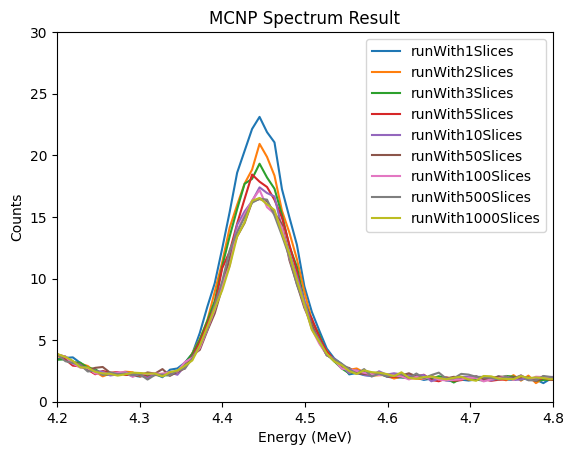

In [49]:
plt.figure()
for _, spectrum in enumerate(spectrums):
    plt.plot(bins, spectrum[0], label=trials['name'][_])
plt.legend()
# plt.xlim(1.6, 2.0)
# plt.ylim(0, 60)
plt.xlim(4.2, 4.8)
plt.ylim(0, 30)
plt.xlabel('Energy (MeV)')
plt.ylabel('Counts')
plt.title('MCNP Spectrum Result')
plt.savefig('imgs/mcnp_results.png')
plt.show()

In [50]:
Analyzer = insd.Analyzer()

In [51]:
for _, spectrum in enumerate(spectrums):
    Analyzer.addSpectrum(
        [bins,spectrum[0]], 
        trials['name'][_]
        )

In [52]:
spec_labels = [i for i in Analyzer.spectrums.keys()]

In [53]:
Analyzer.toDataFrame()

,label,bins,vals,areas,fits,true_comp,pred_comp,for_calib,area_calc_failed
0,runWith1Slices,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[4.569999999999999, 0.0, 8.4, 14.55, 20.5, 25....","{'Si1': None, 'Si2C1': None}","{'Si1': {'bins': None, 'baseline': None, 'peak...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
1,runWith2Slices,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[4.569999999999999, 0.01, 8.290000000000001, 1...","{'Si1': None, 'Si2C1': None}","{'Si1': {'bins': None, 'baseline': None, 'peak...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
2,runWith3Slices,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[4.7, 0.0, 8.43, 15.06, 20.439999999999998, 25...","{'Si1': None, 'Si2C1': None}","{'Si1': {'bins': None, 'baseline': None, 'peak...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
3,runWith5Slices,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[4.66, 0.0, 8.959999999999999, 13.98, 20.84999...","{'Si1': None, 'Si2C1': None}","{'Si1': {'bins': None, 'baseline': None, 'peak...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
4,runWith10Slices,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[4.51, 0.0, 9.139999999999999, 15.069999999999...","{'Si1': None, 'Si2C1': None}","{'Si1': {'bins': None, 'baseline': None, 'peak...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
5,runWith50Slices,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[4.68, 0.01, 8.66, 14.87, 20.430000000000003, ...","{'Si1': None, 'Si2C1': None}","{'Si1': {'bins': None, 'baseline': None, 'peak...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
6,runWith100Slices,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[4.859999999999999, 0.0, 8.01, 14.66, 20.64, 2...","{'Si1': None, 'Si2C1': None}","{'Si1': {'bins': None, 'baseline': None, 'peak...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
7,runWith500Slices,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[4.53, 0.0, 8.0, 14.41, 19.07, 25.67, 38.84, 6...","{'Si1': None, 'Si2C1': None}","{'Si1': {'bins': None, 'baseline': None, 'peak...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
8,runWith1000Slices,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[4.7700000000000005, 0.01, 8.64, 15.5499999999...","{'Si1': None, 'Si2C1': None}","{'Si1': {'bins': None, 'baseline': None, 'peak...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False


In [54]:
regression_results, fits = Analyzer.calcPeakAreas(
    spec_labels, 
    returnFits=True, 
    peakWindows={
        'Si1': [1.6, 2.2], 
        'Si2C1': [4.3, 4.61]
        }, 
    baselineFunction='exp_falloff', 
    peakFunction='gaussian'
    )

In [55]:
fits

{'runWith1Slices': {'Si1': {'bins': array([1.60821, 1.61724, 1.62628, 1.63531, 1.64435, 1.65338, 1.66242,
          1.67145, 1.68049, 1.68952, 1.69856, 1.70759, 1.71663, 1.72566,
          1.7347 , 1.74373, 1.75277, 1.7618 , 1.77084, 1.77987, 1.7889 ,
          1.79794, 1.80697, 1.81601, 1.82504, 1.83408, 1.84311, 1.85215,
          1.86118, 1.87022, 1.87925, 1.88829, 1.89732, 1.90636, 1.91539,
          1.92443, 1.93346, 1.9425 , 1.95153, 1.96057, 1.9696 , 1.97864,
          1.98767, 1.99671, 2.00574, 2.01478, 2.02381, 2.03285, 2.04188,
          2.05091, 2.05995, 2.06898, 2.07802, 2.08705, 2.09609, 2.10512,
          2.11416, 2.12319, 2.13223, 2.14126, 2.1503 , 2.15933, 2.16837,
          2.1774 , 2.18644, 2.19547]),
   'baseline': [11.454361540709712,
    11.089062636743307,
    10.746103194224094,
    10.424829276440374,
    10.123202519440301,
    9.840647797465026,
    9.575372405511693,
    9.326870530658995,
    9.093565520599899,
    8.875012521826418,
    8.66982489655188,
  

In [56]:
Analyzer.toDataFrame()

,label,bins,vals,areas,fits,true_comp,pred_comp,for_calib,area_calc_failed
0,runWith1Slices,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[4.569999999999999, 0.0, 8.4, 14.55, 20.5, 25....","{'Si1': 2.8645169766001266, 'Si2C1': 1.9795330...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
1,runWith2Slices,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[4.569999999999999, 0.01, 8.290000000000001, 1...","{'Si1': 3.0226331067508467, 'Si2C1': 1.7395282...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
2,runWith3Slices,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[4.7, 0.0, 8.43, 15.06, 20.439999999999998, 25...","{'Si1': 3.0179954718709237, 'Si2C1': 1.6404750...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
3,runWith5Slices,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[4.66, 0.0, 8.959999999999999, 13.98, 20.84999...","{'Si1': 3.021913134063965, 'Si2C1': 1.56772389...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
4,runWith10Slices,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[4.51, 0.0, 9.139999999999999, 15.069999999999...","{'Si1': 3.0858708292205117, 'Si2C1': 1.4698192...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
5,runWith50Slices,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[4.68, 0.01, 8.66, 14.87, 20.430000000000003, ...","{'Si1': 3.0518330976958072, 'Si2C1': 1.3932765...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
6,runWith100Slices,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[4.859999999999999, 0.0, 8.01, 14.66, 20.64, 2...","{'Si1': 3.048669601228805, 'Si2C1': 1.40797247...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
7,runWith500Slices,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[4.53, 0.0, 8.0, 14.41, 19.07, 25.67, 38.84, 6...","{'Si1': 3.040739467229927, 'Si2C1': 1.44118350...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
8,runWith1000Slices,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[4.7700000000000005, 0.01, 8.64, 15.5499999999...","{'Si1': 3.0950846581380516, 'Si2C1': 1.3936037...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False


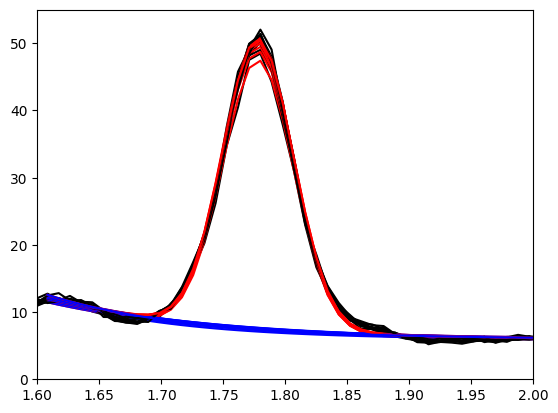

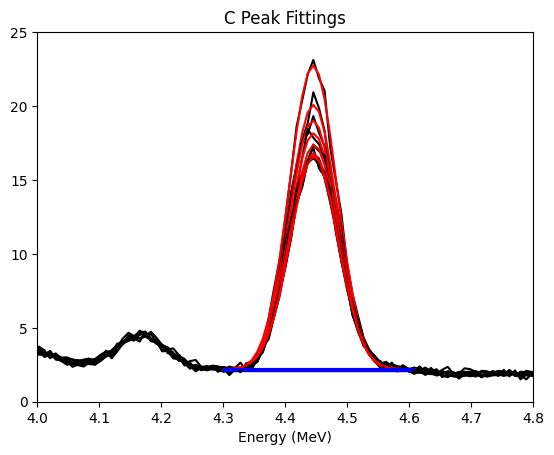

In [57]:
df = Analyzer.toDataFrame()
plt.figure()
for i in range(len(df)):
    plt.plot(df['bins'][i], df['vals'][i], color='black')
    plt.plot(df['fits'][i]['Si1']['bins'], df['fits'][i]['Si1']['peak'], color='red')
    plt.plot(df['fits'][i]['Si1']['bins'], df['fits'][i]['Si1']['baseline'], color='blue')
plt.xlim(1.6, 2)
plt.ylim(0, 55)
plt.show()

plt.figure()
for i in range(len(df)):
    plt.plot(df['bins'][i], df['vals'][i], color='black')
    plt.plot(df['fits'][i]['Si2C1']['bins'], df['fits'][i]['Si2C1']['peak'], color='red')
    plt.plot(df['fits'][i]['Si2C1']['bins'], df['fits'][i]['Si2C1']['baseline'], color='blue')
plt.xlim(4.0, 4.8)
plt.ylim(0, 25)
plt.title('C Peak Fittings')
plt.xlabel('Energy (MeV)')
plt.savefig('imgs/peak_fitting.png')
plt.show()


In [58]:
df.head(n=2)

,label,bins,vals,areas,fits,true_comp,pred_comp,for_calib,area_calc_failed
0,runWith1Slices,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[4.569999999999999, 0.0, 8.4, 14.55, 20.5, 25....","{'Si1': 2.8645169766001266, 'Si2C1': 1.9795330...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
1,runWith2Slices,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[4.569999999999999, 0.01, 8.290000000000001, 1...","{'Si1': 3.0226331067508467, 'Si2C1': 1.7395282...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False


In [59]:
df['c_area'] = [x['Si2C1'] for x in df['areas']]

In [60]:
df['level'] = slice_levels
df['lms'] = lms

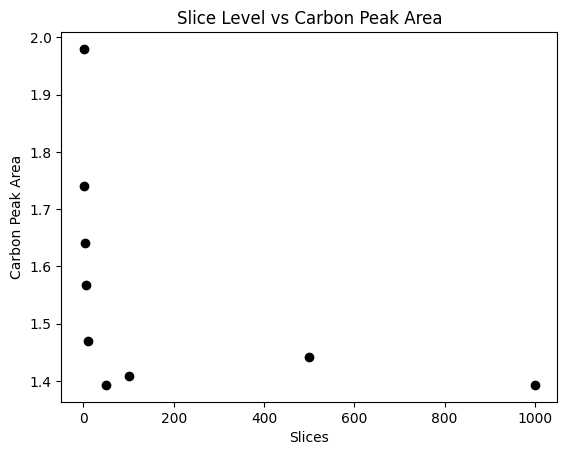

In [62]:
# slice level vs Si2C1 peak area
plt.figure()
for i in range(len(df)):
    plt.plot(df['level'][i], df['c_area'][i], marker='o', color='black')

plt.xlabel('Slices')
plt.ylabel('Carbon Peak Area')
plt.title('Slice Level vs Carbon Peak Area')
plt.savefig('imgs/peak_areas.png')
plt.show()